# Machine Learning and Wine Quality

In [ ]:
# where is the source code for this originate?

### Import Modules and Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html
import seaborn as sns


from sklearn.model_selection import train_test_split 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn import metrics 
# https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics

from sklearn import preprocessing
# https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing

from sklearn.pipeline import make_pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.ensemble import RandomForestClassifier
# https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.metrics import confusion_matrix,accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

import sklearn
import time
%matplotlib inline

### Import Data

In [97]:
redWine = pd.read_csv('/Users/vincenzo/Desktop/Repos/tts-ds-fundamentals-course-main/datascience/python/tts-datascience-ml-wine-analysis/wine_red_white/winequality-red.csv', sep = ';')
whiteWine = pd.read_csv('/Users/vincenzo/Desktop/Repos/tts-ds-fundamentals-course-main/datascience/python/tts-datascience-ml-wine-analysis/wine_red_white/winequality-white.csv', sep = ';')
redWine
whiteWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### So Fresh and So Clean (Clean Data)

In [98]:
#Cleaning the data
redWine.drop_duplicates(inplace=True)
redWine.drop_duplicates(inplace=True)
#Checks to male sure no leftover non applicable terms in the data sets
print('NAs in Red:', redWine.isna().any().any(),'\n')
print('NAs in White:', whiteWine.isna().any().any(),'\n')

NAs in Red: False 

NAs in White: False 



### Heatmaps

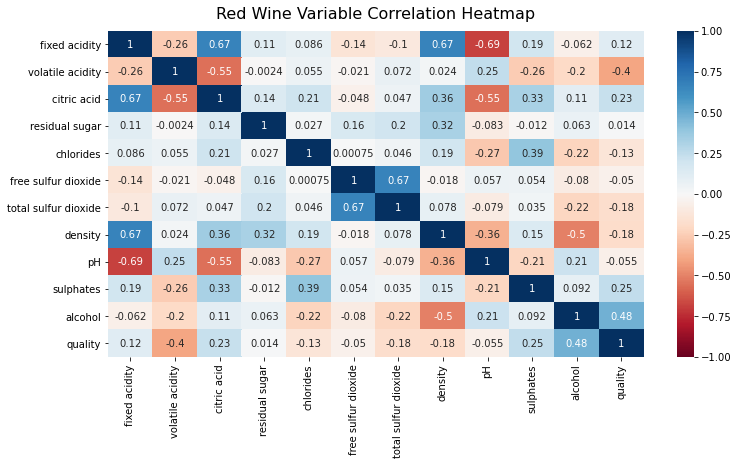

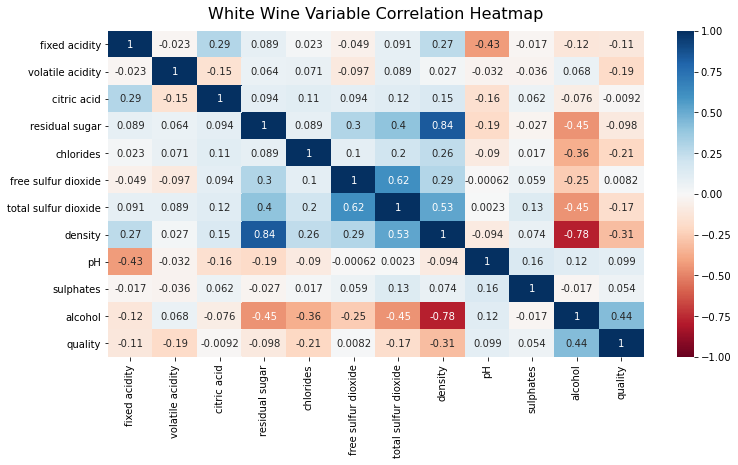

In [99]:
#creates picture w/ designated size (12,6)
plt.figure(figsize=(12,6))
#creates heatmap that correlates the red wine data, sets range from -1 to 1, and sets the color
heatmap = sns.heatmap(redWine.corr(), vmin = -1, vmax=1, annot = True, cmap = 'RdBu')
heatmap.set_title('Red Wine Variable Correlation Heatmap', fontdict={'fontsize':16}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
#creates picture w/ designated size (12,6)
plt.figure(figsize=(12,6))
#creates heatmap that correlates the white wine data, sets range from -1 to 1, and sets the color
heatmap = sns.heatmap(whiteWine.corr(), vmin = -1, vmax=1, annot = True, cmap = 'RdBu')
heatmap.set_title('White Wine Variable Correlation Heatmap', fontdict={'fontsize':16}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

### Distributions of Quality Scores

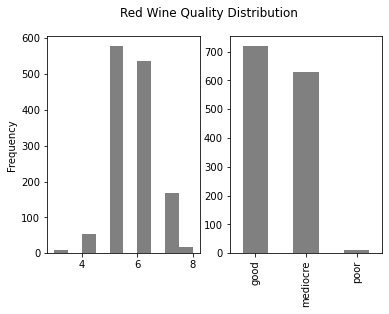

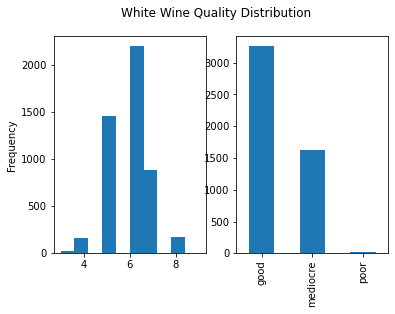

In [103]:
#create subgroups of red wine quality with scores of 0 to 3 being poor, 4 to 6 being mediocre, and 7+ being good
x = []
for element in redWine.quality:
    if ((element >=0) and (element <4)):
        x.append('poor')
    elif ((element >= 4) and (element<6)):
        x.append('mediocre')
    else:
        x.append('good')

redWine['grouped quality'] = x

plt.figure()
#creates histogram of raw red wine quality scores
plt.subplot(121)
redWine.quality.plot(kind='hist', color = 'gray')
#creates histogram for grouped red wine quality scores
plt.subplot(122)
adj_aw_hist = redWine['grouped quality'].value_counts()
adj_aw_hist.plot(kind = 'bar', color = 'gray')

plt.suptitle('Red Wine Quality Distribution')

plt.show()


#create subgroups of white wine quality with scores of 0 to 3 being poor, 4 to 6 being mediocre, and 7+ being good
x = []
for element in whiteWine.quality:
    if ((element >=0) and (element <4)):
        x.append('poor')
    elif ((element >= 4) and (element<6)):
        x.append('mediocre')
    else:
        x.append('good')

whiteWine['grouped quality'] = x

plt.figure()
#creates histogram of raw white wine quality scores
plt.subplot(121)
whiteWine.quality.plot(kind='hist')
#creates histogram for grouped white wine quality scores
plt.subplot(122)
adj_aw_hist = whiteWine['grouped quality'].value_counts()
adj_aw_hist.plot(kind="bar")

plt.suptitle('White Wine Quality Distribution')

plt.show()

### Target Features and Arrays

In [74]:
target_qual = all_wines.quality
target_adj_qual = all_wines['adjusted quality']

y = []
for element in wine_red.quality:
    if ((element >= 0 ) and (element < 5)):
        y.append('poor')
    elif ((element >= 5) and (element < 7)):
        y.append('decent')
    else: 
        y.append('good')
        
wine_red['adjusted quality'] = y
target_red = wine_red.quality
target_adj_red = wine_red['adjusted quality']
features_red = wine_red.iloc[:, :-2]

z = []
for element in wine_white.quality:
    if ((element >= 0) and (element < 5)):
        z.append('poor')
    elif ((element >= 5 ) and (element < 7)):
        z.append('decent')
    else:
        z.append('good')

wine_white['adjusted quality'] = z
target_white = wine_white.quality
target_adj_white = wine_white['adjusted quality']
features_white = wine_white.iloc[:, :-2]

### Feature Selection

<AxesSubplot:>

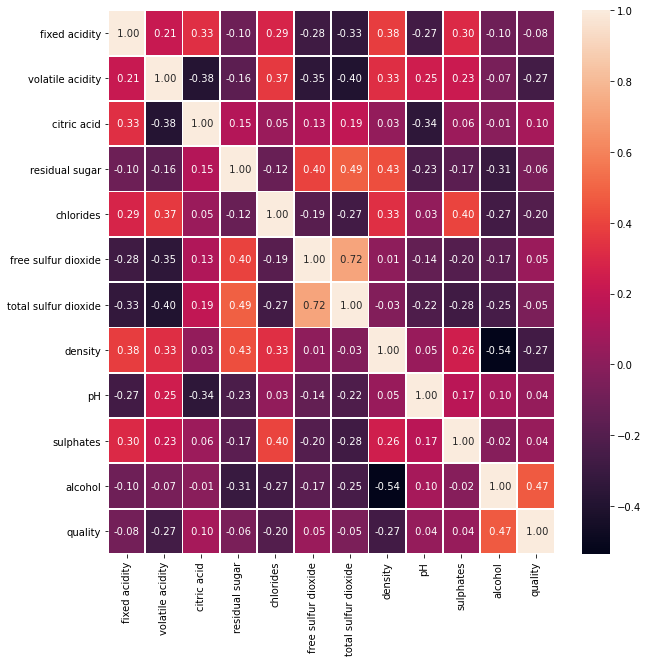

In [78]:
features = all_wines.iloc[:, :-2]

features_selected = []
feature_names = [x for x in features.columns]
for name in feature_names:
    coef, p = kendalltau(features[f'{name}'], target_qual)
    if p < .01:
        features_selected.append(name)

selected_features = all_wines[features_selected]
selected_features_red = features_red[features_selected]
selected_features_white = features_white[features_selected]

features2 = all_wines.iloc[:, :-1]
corr_matrix = features2.round(2).corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True, linewidth = .8, fmt = ' .2f', ax = ax)

### Logistic Regression - All Wines

The LogReg Score for All Wine (3-9 Scale) is: 55.08% 

The LogReg Score for All Wine (Poor, Decent, Good) is: 76.69% 
 Time Efficiency: 0.5


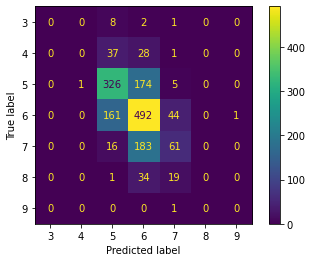

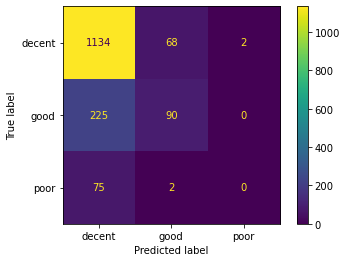

In [82]:
# 3 - 9 Scale
start_time = time.time() #starts timer
feature_train, feature_test, target_train, target_test = train_test_split(selected_features,
                                                                          target_qual,
                                                                          test_size = 0.3,
                                                                          random_state = 1111)

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 5000))
pipe.fit(feature_train, target_train)

log_score_sel_qual = pipe.score(feature_test, target_test)

print(f'The LogReg Score for All Wine (3-9 Scale) is: {log_score_sel_qual.round(4)*100}%', '\n')


cm_plot = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)

# Poor, Decent, Good Scale:
feature_train, feature_test, target_train, target_test = train_test_split(selected_features,
                                                                         target_adj_qual,
                                                                         test_size = 0.3,
                                                                         random_state = 1111)

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 5000))
pipe.fit(feature_train, target_train)

log_score_sel_adj_qual = pipe.score(feature_test, target_test)

end_time = time.time() # ends the timer

av_log_time = end_time - start_time

print(f'The LogReg Score for All Wine (Poor, Decent, Good) is: {log_score_sel_adj_qual.round(4)*100}%', '\n', f'Time Efficiency: {round(av_log_time, 2)}')

cm_plot_alt = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)

### Logistic Regression - Red Wine 

The LogReg Score for Red Wine (3-9 Scale) is: 58.330000000000005% 

The LogReg Score for Red Wine (Poor, Decent, Good) is: 85.78% 
 Time Efficiency: 252.98


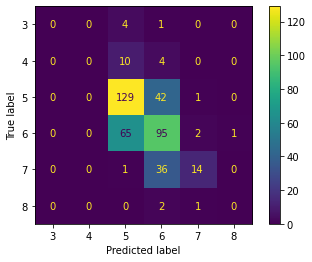

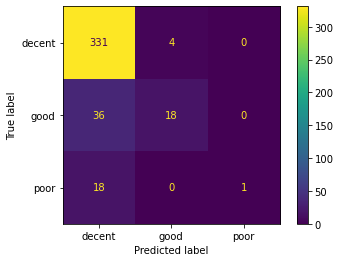

In [83]:
feature_train, feature_test, target_train, target_test = train_test_split(selected_features_red,
                                                                         target_red,
                                                                         test_size = 0.3,
                                                                         random_state = 1111)

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 5000))
pipe.fit(feature_train, target_train)

log_score_sel_red = pipe.score(feature_test, target_test)

print(f'The LogReg Score for Red Wine (3-9 Scale) is: {log_score_sel_red.round(4)*100}%', '\n')


cm_plot = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)

# Poor, Decent, Good Scale:
feature_train, feature_test, target_train, target_test = train_test_split(selected_features_red,
                                                                         target_adj_red,
                                                                         test_size = 0.3,
                                                                         random_state = 1111)

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 5000))
pipe.fit(feature_train, target_train)

log_score_sel_adj_qual = pipe.score(feature_test, target_test)

end_time = time.time() # ends the timer

av_log_time = end_time - start_time

print(f'The LogReg Score for Red Wine (Poor, Decent, Good) is: {log_score_sel_adj_qual.round(4)*100}%', '\n', f'Time Efficiency: {round(av_log_time, 2)}')

cm_plot_alt = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)

### Logistic Regression - White Wine 

The LogReg Score for White Wine (3-9 Scale) is: 58.330000000000005% 

The LogReg Score for White Wine (Poor, Decent, Good) is: 76.2% 
 Time Efficiency: 336.16


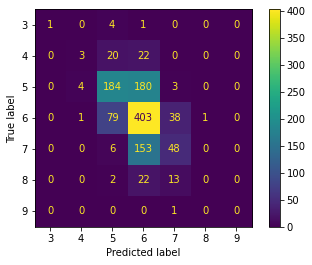

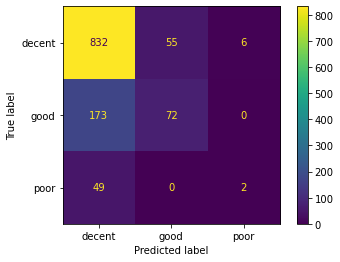

In [84]:
feature_train, feature_test, target_train, target_test = train_test_split(selected_features_white,
                                                                         target_white,
                                                                         test_size = 0.3,
                                                                         random_state = 1111)

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 5000))
pipe.fit(feature_train, target_train)

log_score_sel_white = pipe.score(feature_test, target_test)

print(f'The LogReg Score for White Wine (3-9 Scale) is: {log_score_sel_red.round(4)*100}%', '\n')


cm_plot = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)

# Poor, Decent, Good Scale:
feature_train, feature_test, target_train, target_test = train_test_split(selected_features_white,
                                                                         target_adj_white,
                                                                         test_size = 0.3,
                                                                         random_state = 1111)

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 5000))
pipe.fit(feature_train, target_train)

log_score_sel_adj_white = pipe.score(feature_test, target_test)

end_time = time.time() # ends the timer

av_log_time = end_time - start_time

print(f'The LogReg Score for White Wine (Poor, Decent, Good) is: {log_score_sel_adj_white.round(4)*100}%', '\n', f'Time Efficiency: {round(av_log_time, 2)}')

cm_plot_alt = sklearn.metrics.plot_confusion_matrix(pipe, feature_test, target_test)

### Random Forest - Red Wine

In [107]:
# Red Wine Only 

# 'poor','decent','good' Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_red,
                                                      target_adj_red,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(feature_train, target_train)

rf_sel_adj_qual_red = pipe.score(feature_test,target_test)

print(f'The (Alt Scale) Random Forest Score for Red Wine is: {round(rf_sel_adj_qual_red,4)*100}%','\n')


The (Alt Scale) Random Forest Score for Red Wine is: 83.82% 



### Random Forest - White Wine

In [109]:
# 'poor','decent','good' Scale

feature_train,feature_test,target_train,target_test = train_test_split(selected_features_white,
                                                      target_adj_white,
                                                      test_size=0.3,
                                                      random_state=1111) 

pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(feature_train, target_train)

rf_sel_adj_qual_white = pipe.score(feature_test,target_test)

print(f'The (Alt Scale) Random Forest Score for White Wine is: {round(rf_sel_adj_qual_white,4)*100}%','\n')

The (Alt Scale) Random Forest Score for White Wine is: 78.72% 



### K-Nearest Neighbors - Red Wine

In [110]:
feature_train,feature_test,target_train,target_test = train_test_split(selected_features_red,
                                                 target_adj_red,
                                                 test_size=0.3,
                                                 random_state=1111)


classifier = KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance',p=1, leaf_size=1)
classifier.fit(feature_train,target_train)

target_pred = classifier.predict(feature_test)

KNN_sel_adj_score_red = accuracy_score(target_test,target_pred)

print(f'The (Alt Scale) KNN Score for Red Wine is: {round(KNN_sel_adj_score_red,4)*100}%','\n')

The (Alt Scale) KNN Score for Red Wine is: 82.11% 



### K-Nearest Neighbors - White Wine

In [111]:
feature_train,feature_test,target_train,target_test = train_test_split(selected_features_white,
                                                 target_adj_white,
                                                 test_size=0.3,
                                                 random_state=1111)


classifier = KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance',p=1, leaf_size=1)
classifier.fit(feature_train,target_train)

target_pred = classifier.predict(feature_test)

KNN_sel_adj_score_white = accuracy_score(target_test,target_pred)

print(f'The (Alt Scale) KNN Score for White Wine is: {round(KNN_sel_adj_score_white,4)*100}%','\n')

The (Alt Scale) KNN Score for White Wine is: 73.92999999999999% 



### Comparison of Prediction Accuracies across Model and Wine Color


Figure(432x288)


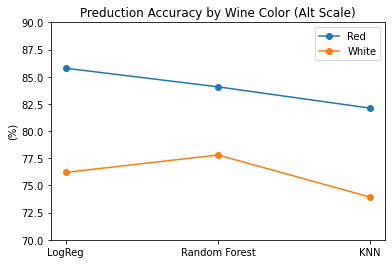

In [115]:
alt_red = [85.78, 84.07, 82.11]
alt_white = [76.2, 77.8, 73.93]

fig, ax = plt.subplots()
ax.plot(['LogReg','Random Forest', 'KNN'], alt_red, marker='o')
ax.plot(alt_white,marker='o')
ax.set(title='Preduction Accuracy by Wine Color (Alt Scale)')
ax.set_ylim(70,90)
ax.set_ylabel('(%)')
ax.legend(['Red','White','Both'])

print(fig)

### Comparison of Time Efficiencies

Figure(432x288)


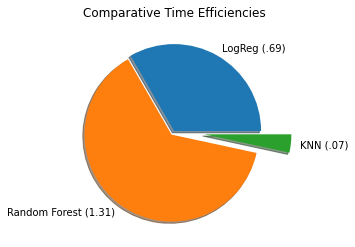

In [116]:
times = [.69, 1.31, .07]

pie, ax = plt.subplots()
ax.pie(times,labels=['LogReg (.69)','Random Forest (1.31)','KNN (.07)'], 
       explode=[0,.05,.35], shadow=True, normalize=True)
ax.set_title('Comparative Time Efficiencies')

print(pie)